In [1]:
import ee
import sys
sys.path.insert(1,'w:/antpod/alpha/apGIS-0.4.0/')

In [2]:
from apgis import *
from apgis.gisgeodf import *

from apgis.gisgeodf import *
from apgis.gisraster import *
from apgis.geespatial import *
import contextily as ctx
from apgis.apresource import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [3]:
eeInitialize(internalConfig=True)

Import GeoJSON and Products

In [4]:
aoijson =  apjsonio.geojsonRead("W:\\antpod\\alpha\\resource\\geojson\\FarmKanchi.geojson")
aoi = ee.Geometry.Polygon(aoijson["features"][0]["geometry"]["coordinates"][0])
s2 = ee.ImageCollection("COPERNICUS/S2_SR").filterDate("2020-03-01", "2020-08-31").filterBounds(aoi)

rq = RequestList(["NDVI", "NDWI"], "L2A")

res = Resource(remotefile="karayambedu1_L.geojson")

Export ImageCollection

In [5]:
# from apgis.geeexport import Export
# tasks = Export.ImageCollection.toDrive(imageCol=s2, requestList=rq, field=res.field, folder="Batch Export")

# for task in tasks:
#     for t in task:
#         t.start()

Read

In [6]:
geo10 = apjsonio.geojsonRead("acre10.geojson")
geo20 = apjsonio.geojsonRead("acre20.geojson")

geo10 = ee.Geometry.Polygon(geo10["features"][0]["geometry"]["coordinates"])
geo20 = ee.Geometry.Polygon(geo20["features"][0]["geometry"]["coordinates"])

In [7]:
area10 = geespatial.getArea(geo10, "ACRE")
area10

8.545

In [8]:
area20 = geespatial.getArea(geo20, "ACRE")
area20

16.773

In [9]:
acre10 = makeGridDF("acre10.geojson", "epsg:3857", spacing=0.0003)
acre20 = makeGridDF("acre20.geojson", "epsg:3857", spacing=0.0003)

Last Week- Acre 10

In [10]:
r23ndvi = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDVI-2020-08-23.tif")
r23ndwi = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDWI-2020-08-23.tif")
r28ndvi = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDVI-2020-08-28.tif")
r28ndwi = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDWI-2020-08-28.tif")

In [11]:
aug23 = r23ndvi.assignMean(acre10)
aug23 = r23ndwi.assignMean(acre10)

aug28 = r28ndvi.assignMean(acre10)
aug28 = r28ndwi.assignMean(acre10)

In [12]:
# exportGeoDF(aug23, 'output', 'GeoJSON')

In [13]:
def getScore(dataframe, column, threshold): 
    score = len(dataframe[(dataframe[column]>threshold)])/dataframe.shape[0] 
    score = score*100
    return round(score,2)

In [15]:
aug23ndviscore = getScore(aug23, 'meanNDVI', 0.6)

aug23ndwiscore = getScore(aug23, 'meanNDWI', -0.55)

aug28ndviscore = getScore(aug28, 'meanNDVI', 0.6)

aug28ndwiscore = getScore(aug28, 'meanNDWI', -0.55)

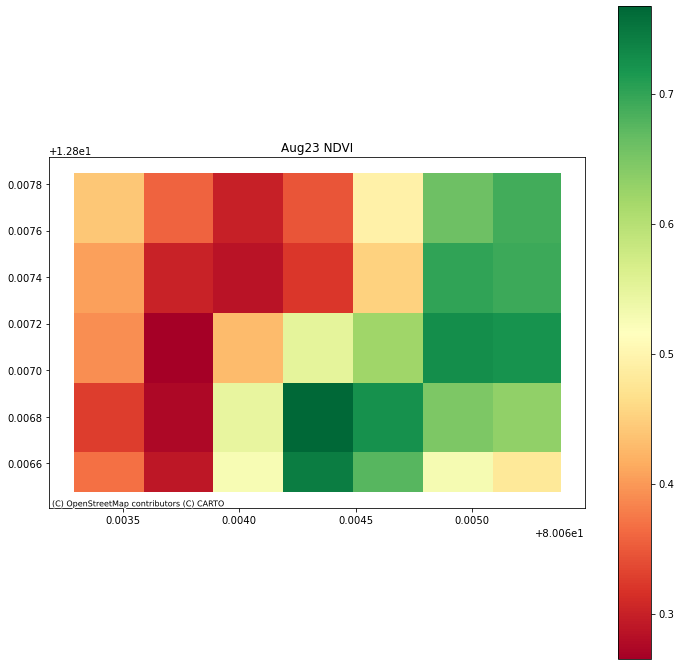

In [49]:
ax = aug23.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn', legend = True)
plt.title('Aug23 NDVI')
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

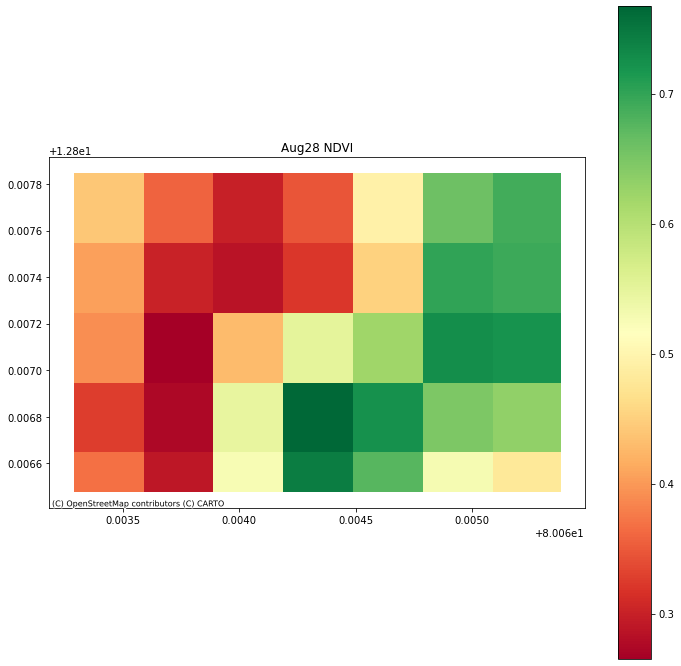

In [50]:
ax = aug28.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
plt.title('Aug28 NDVI')
# aug28.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

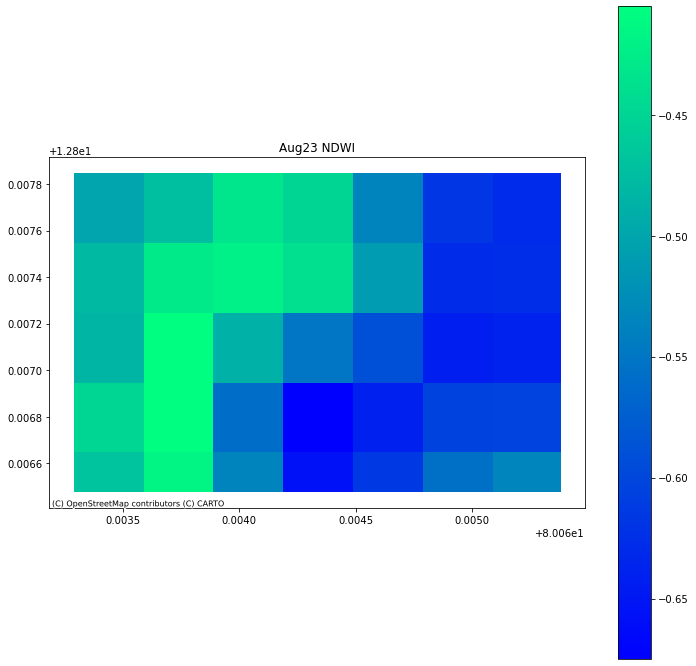

In [51]:
ax = aug23.plot('meanNDWI', figsize = (12,12), cmap = 'winter', legend = True)
plt.title('Aug23 NDWI')
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

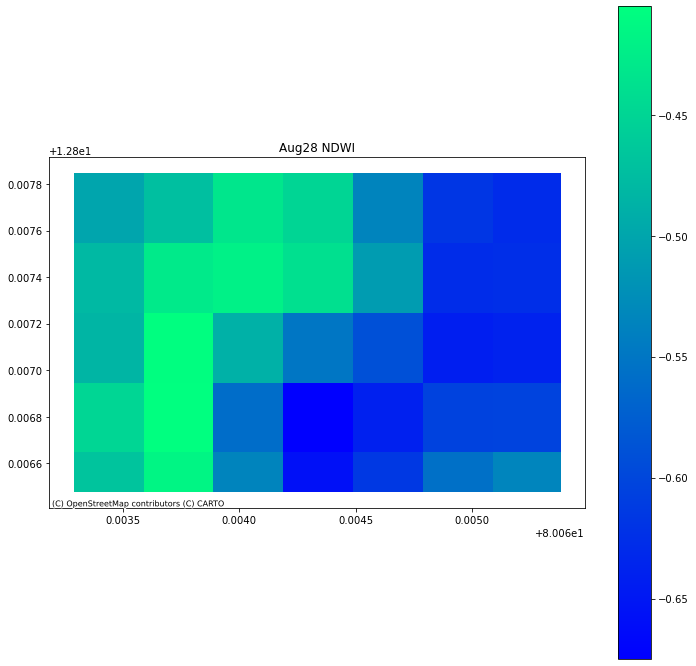

In [52]:
ax= aug28.plot('meanNDWI', figsize = (12,12), cmap = 'winter',  legend = True)
plt.title('Aug28 NDWI')
# aug28.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

Last Week- Acre 20

In [15]:
aug23ndvi = r23ndvi.assignMean(acre20)
aug23ndwi = r23ndwi.assignMean(acre20)
aug28ndvi = r28ndvi.assignMean(acre20)
aug28ndwi = r28ndwi.assignMean(acre20)

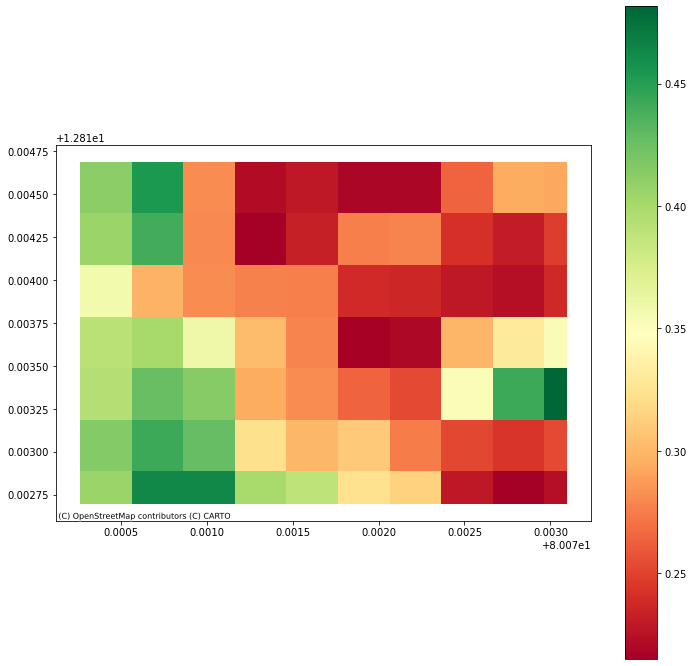

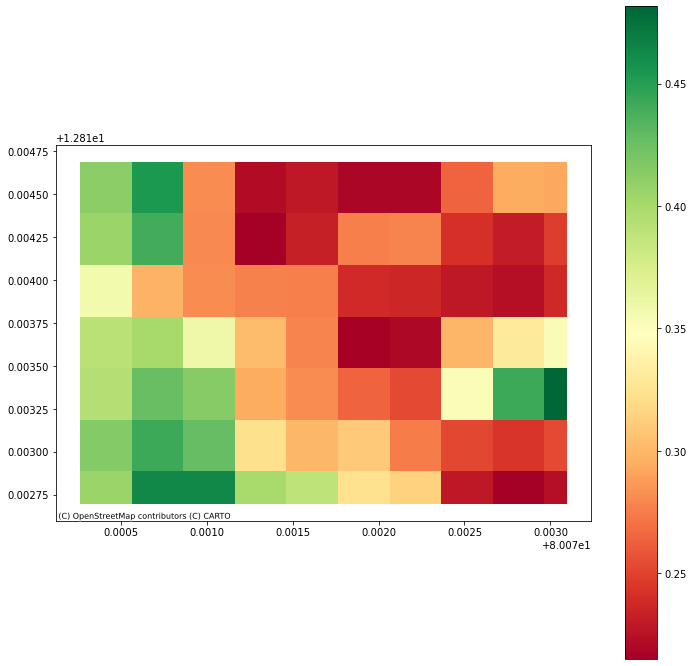

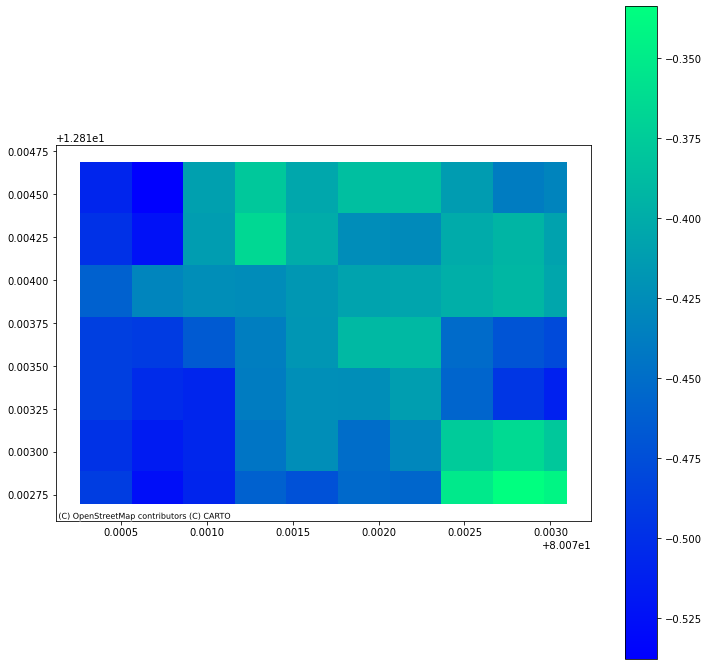

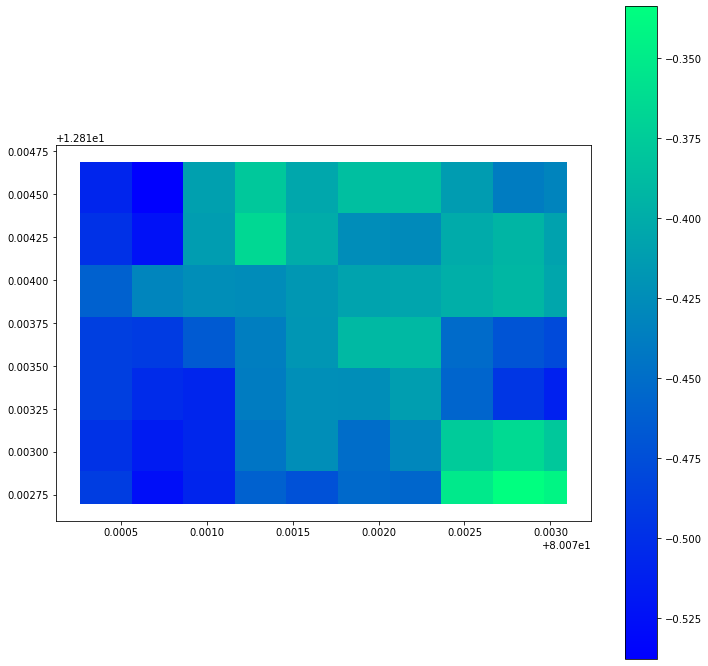

In [13]:
ax = aug23ndvi.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn', legend = True)
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

ax= aug28ndvi.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
# aug28.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

ax = aug23ndwi.plot('meanNDWI', figsize = (12,12), cmap = 'winter', legend = True)
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

ax= aug28ndwi.plot('meanNDWI', figsize = (12,12), cmap = 'winter',  legend = True)
# aug28.boundary.plot(ax=plt.gca(),color='k')

In [14]:
exportGeoDF(aug23, 'output2', 'GeoJSON')